In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

In [3]:
def load_epochs_losses(f):
    files = (pathlib.Path(f) / 'hist.txt').read_text().split('\n')
    actual = [f for f in files if f.endswith('.pt')]
    epochs = []
    losses = []
    for f in actual:
        if 'batch' in f:
            continue
        f = f[:-3] # remove .pt
        _, epoch_str, loss_str = f.split('_')
        _, epoch = epoch_str.split('=')
        _, loss = loss_str.split('=')
        epochs.append(int(epoch))
        losses.append(float(loss))
    epochs = np.array(epochs)
    losses = np.array(losses)
    indices = np.argsort(epochs)
    epochs = epochs[indices]
    losses = losses[indices]
    return epochs, losses

In [4]:
epochs, losses = load_epochs_losses('weights/dgmr_dct')

Text(0.5, 1.0, 'DCT-Trick Performance')

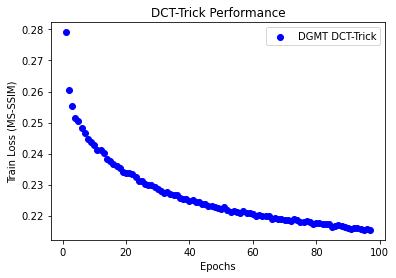

In [5]:
plt.scatter(epochs, losses, label='DGMT DCT-Trick', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Train Loss (MS-SSIM)')
plt.legend()
plt.title('DCT-Trick Performance')